## Data science group project 

## Data:  
Number of transports by different types of passengers

In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.feature_selection import RFE


In [147]:
data = pd.read_csv("Untitled Folder/Bus Card Type.xlsx - Bus Card Type.csv.csv")
data.head()

,Month number,Date,Adult,Child/Youth,Concession,Employee,Free Travel,School Student,Senior/Pensioner,On Demand,CTP,Day Pass Child/Youth w/o SAF,Day Pass without SAF,Monthly passengers
0,0,16-Jul,390433,62800,136064,0,1149,138642,206110,0,0,0,0,935198
1,1,16-Aug,386386,67010,73590,0,1281,296261,224668,0,0,0,0,1049196
2,2,16-Sep,370068,70022,61676,0,1320,203827,218598,0,0,0,0,925511
3,3,16-Oct,381402,78951,60635,0,1410,197558,227088,0,0,0,0,947044
4,4,16-Nov,405245,76328,57858,0,1462,255994,236965,0,0,0,0,1033852


In [20]:
data.shape

(62, 14)

In [131]:
data.tail()

,Month number,Date,Adult,Child/Youth,Concession,Employee,Free Travel,School Student,Senior/Pensioner,On Demand,CTP,Day Pass Child/Youth w/o SAF,Day Pass without SAF,Monthly passengers
57,57,21-Apr,271849,52658,36117,1944,1353,69598,176368,8887,101192,1,99,720066
58,58,21-May,289229,42457,42044,1967,1329,132272,183225,10133,106754,0,147,809557
59,59,21-Jun,259924,34715,32919,1314,1081,102099,163825,9366,97027,0,95,702365
60,60,21-Jul,127354,11205,10461,513,488,1276,75935,0,48652,0,79,275963
61,61,21-Aug,102883,6708,7436,480,389,1501,63463,0,39328,1,81,222270


<AxesSubplot:xlabel='Date', ylabel='million'>

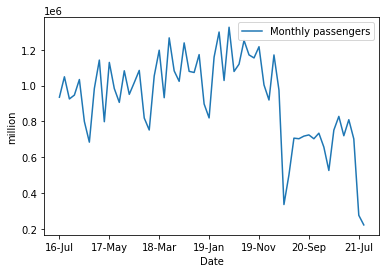

In [22]:
data.plot(ylabel='million',x='Date',y='Monthly passengers')


<AxesSubplot:xlabel='Date'>

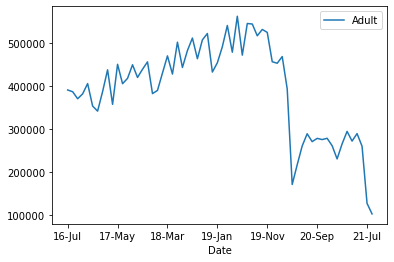

In [129]:
data.plot(x='Date',y='Adult')

<AxesSubplot:xlabel='Date'>

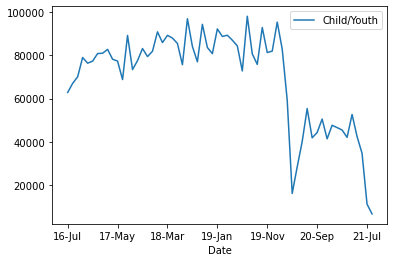

In [24]:
data.plot(x='Date',y='Child/Youth')

### Number Forty-four is the month number before the implementation of first lockdown in 2020

In [158]:
reg = linear_model.LinearRegression()
x = data[['Month number']]
y = data['Monthly passengers']
reg.fit(x[:44], y[:44])
print("y = x *", reg.coef_, "+", reg.intercept_)


y = x * [5546.41254405] + 920820.7666666667


In [197]:
## Linear model built by using the Monthly passengers data before the lockdown
m,b = np.polyfit(X[:44], y[:44], 1)


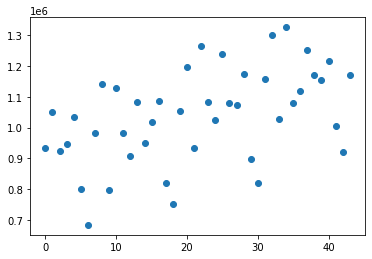

In [202]:
## The number of Monthly passengers before the lockdown (Month number 44, Mar-20)
plt.plot(x[:44], y[:44], 'o')




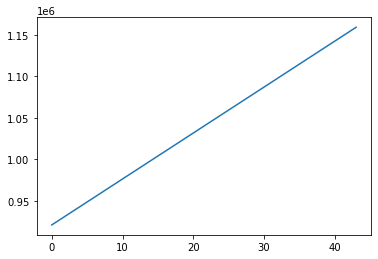

In [209]:
## The line of best fit for the graph above
plt.plot(x[:44], m*x[:44] + b)


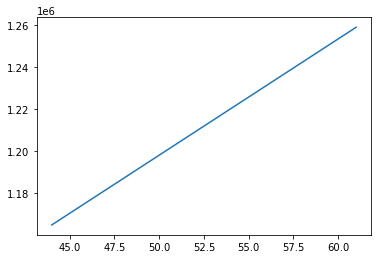

In [210]:
## The theorectical trend of Monthly passengers number if there's no covid-19
plt.plot(x[44:], m*x[44:] + b)

In [211]:
##Linear to predict the total number of monthly passengers if there's no covid-19
no_covid=reg.predict(x[44:])
no_covid

array([1164862.91860465, 1170409.3311487 , 1175955.74369274,
       1181502.15623679, 1187048.56878083, 1192594.98132488,
       1198141.39386892, 1203687.80641297, 1209234.21895701,
       1214780.63150106, 1220327.0440451 , 1225873.45658915,
       1231419.86913319, 1236966.28167724, 1242512.69422128,
       1248059.10676533, 1253605.51930937, 1259151.93185342])

In [168]:
no_covid.sum()

21816133.65412262

In [181]:
yes_covid=(data['Monthly passengers'][44:])
yes_covid.sum()

11595381

In [172]:
print('Therefore, the theorectical estimated loss of  passengers due to covid-19 in Sydney bus sector is: ',(no_covid.sum())-(yes_covid.sum()), 'after the implementation of the first lockdown in 2020.')

Therefore, the estimated loss of  passengers due to covid-19 in Sydney bus sector is:  10220752.65412262 after the implementation of the first lockdown in 2020.


## WE SHOULD make a lot of changes to THE PART BELOW, since X and Y of the linear model have been assigned  values

# IGNORE WHAT'S BELOW FOR NOW

In [128]:
predicted = reg.predict(X)
mse = ((np.array(y)-predicted)**2).sum()/len(y)
r2 = r2_score(y, predicted)

print("MSE:", mse)
print("R Squared:", r2)

MSE: 117892683779.51591
R Squared: -0.9979454398424579


In [50]:
reg = linear_model.LinearRegression()
X = data[['Month number','Monthly passengers']]
y = data['Adult']
reg.fit(X, y)

print("y =X *", reg.coef_, "+", reg.intercept_)

y =X * [-316.21102035    0.40868006] + 24585.49152298912


In [32]:
train, test = train_test_split(data, test_size=0.2, random_state=142)
print(train.shape)
print(test.shape)

(49, 14)
(13, 14)


In [33]:
x_train = data[['Month number','Monthly passengers']]
y_train = data['Adult']
x_test = data[['Month number','Monthly passengers']]
y_test = data['Adult']
reg = linear_model.LinearRegression()
reg.fit(x_train,y_train)
print("y = x *", reg.coef_, "+", reg.intercept_)

y = x * [-316.21102035    0.40868006] + 24585.49152298912


In [157]:
predicted=reg.predict(x_train)
mse = ((np.array(y_train)-predicted)**2).sum()/len(y_train)
r2 = r2_score(y_train, predicted)
print("MSE:", mse)
print("R Squared:", r2)

MSE: 1228802316.7393878
R Squared: 0.8943003617196154


In [162]:
reg.predict(x_train[:3])

array([406782.26306095, 453054.76112871, 402190.95731231])

# Questions:
1.

2.